Kendra Robbins

Week 6 

Differentiation Lab

In [61]:
import sympy as sy
from matplotlib import pyplot as plt
import numpy as np

# Exercise 1

In [68]:
x = sy.symbols('x')
f=(sy.sin(x)+1)**(sy.sin(sy.cos(x)))
fprime= sy.diff(f,x)



In [72]:
fprime

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [76]:
def f3(k):

    x = sy.symbols('x')
    func = lambda k: (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    f = sy.lambdify(x, func(x))
    return f(k)

In [64]:
fprime2 = lambda x: fprime.subs('x',x)
f2 = lambda x: f.subs('x',x)

[]

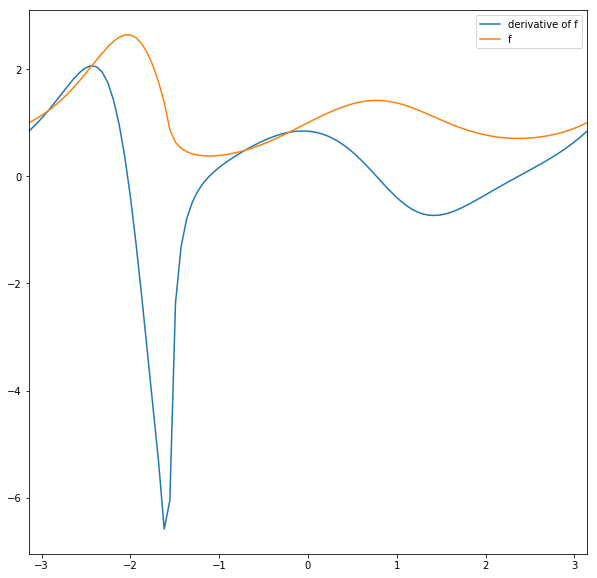

In [65]:
D = np.linspace(-np.pi,np.pi,100)

fprime_vec = np.zeros(100)
f_vec = np.zeros(100)
for i in range(100):
    fprime_vec[i] = fprime2(D[i])
    f_vec[i] = f.subs('x',D[i])
    
plt.figure(figsize=(10,10))
plt.xlim(-np.pi,np.pi)
plt.plot(D,fprime_vec, label = 'derivative of f')
plt.plot(D,f_vec, label = 'f')
plt.legend()
plt.plot()

# Exercise 2

In [64]:
def deriv1(f,xvec,h):
    x = np.array(xvec)
    
    deriv_1 = lambda x: (f((x+h)-f(x)))/h
    
    derivs = np.zeros_like(x)
    for i in range(len(x)):
        derivs[i] = deriv_1(x[i])
    

    return deriv_1

In [67]:
a=deriv1(f2,[1,2],.001)
np.shape(a)

()

In [9]:
def diff_f_1(f, x, h):
    output = (f(x+h) - f(x))/h
    return output

def diff_f_2(f, x, h):
    output = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
    return output

def diff_b_1(f, x, h):
    output = (f(x) - f(x-h))/h
    return output

def diff_b_2(f, x, h):
    output = (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)
    return output

def diff_c_2(f, x, h):
    output = (f(x+h) - f(x-h))/(2*h)
    return output

def diff_c_4(f, x, h):
    output = (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12*h)
    return output

In [10]:
def f_x(x): 
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

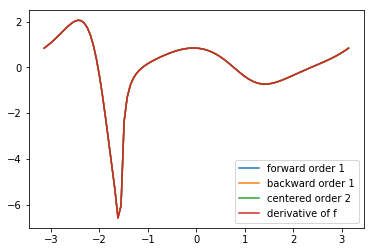

In [11]:
plt.plot(D,diff_f_1(f_x,D,1e-6), label = "forward order 1")
plt.plot(D,diff_b_1(f_x,D,1e-6), label = "backward order 1")
plt.plot(D,diff_c_2(f_x,D,1e-6), label = "centered order 2")
plt.plot(D,fprime_vec, label = 'derivative of f')
plt.legend()
plt.show()

# Problem 3

In [96]:
def errors(x_0):
    
    D = np.logspace(-8,0,10) #h vector 
    
    deriv = fprime2(x_0)
    
    plt.plot(D, np.abs(deriv - diff_f_1(f_x, x_0, D)),'o-', label='Order 1 forward')
    plt.plot(D, np.abs(deriv - diff_f_2(f_x, x_0, D)),'o-', label='Order 2 forward')
    plt.plot(D, np.abs(deriv - diff_b_1(f_x, x_0, D)),'o-', label='Order 1 backward')
    plt.plot(D, np.abs(deriv - diff_b_2(f_x, x_0, D)),'o-', label='Order 2 backward')
    plt.plot(D, np.abs(deriv - diff_c_2(f_x, x_0, D)), 'o-',label='Order 2 centred')
    plt.plot(D, np.abs(deriv - diff_c_4(f_x, x_0, D)),'o-', label='Order 4 centred')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('h')
    plt.ylabel('Absolute error')
    plt.show()
    
    

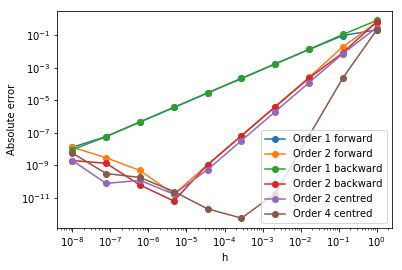

In [97]:
errors(1)

# Problem 4

In [99]:
plane = np.load('plane.npy')

In [100]:
plane

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

In [121]:
plane_rad = plane.copy()
plane_rad[:,1:] = plane_rad[:,1:]*np.pi /180 #convert to radians

In [122]:
plane_rad

array([[ 7.        ,  0.9817477 ,  1.17879538],
       [ 8.        ,  0.96918133,  1.16186568],
       [ 9.        ,  0.95644043,  1.14476146],
       [10.        ,  0.94352499,  1.12730816],
       [11.        ,  0.93095862,  1.11037847],
       [12.        ,  0.91961398,  1.09501957],
       [13.        ,  0.90652401,  1.07721721],
       [14.        ,  0.89500484,  1.06150925]])

In [126]:
xvec = np.zeros(8)
yvec = np.zeros(8)

#compute x and y
for i in range(8):
    xvec[i] = 500*np.tan(plane_rad[i,2])/(np.tan(plane_rad[i,2])-np.tan(plane_rad[i,1]))
    yvec[i]= 500*np.tan(plane_rad[i,2])*np.tan(plane_rad[i,1])/(np.tan(plane_rad[i,2])-np.tan(plane_rad[i,1]))

In [129]:
#get x' and y'
xprime = np.zeros(8)
yprime = np.zeros(8)

xprime[0] = xvec[1]-xvec[0]
yprime[0] = yvec[1] - yvec[0]

xprime[7] = xvec[7] - xvec[6]
yprime[7] = yvec[7] - yvec[6]

for i in (1,2,3,4,5,6):
    xprime[i] = (xvec[i+1] - xvec[i-1])/2
    yprime[i] = (yvec[i+1] - yvec[i-1])/2

In [132]:
speed = np.zeros(8)

for i in range(8):
    speed[i] = np.sqrt(xprime[i]**2+yprime[i]**2)
    
speed

array([46.42420062, 47.00103938, 48.99880514, 50.09944163, 48.29035084,
       51.56455905, 53.92303355, 51.51480057])

# Problem 5

In [162]:
def jacobian(f,x_0,h):
    m = np.size(f(x_0)) #m is dimension of target space
    n = np.size(x_0) #n is dimension of domain 
    
    I = np.eye(n)
    J = (f(x_0 + h*I) - f(x_0 - h*I))/(2*h)
    return J
    
    

In [173]:
def g(x):

    g = np.array([[x[0]**2],[x[0]**3-x[1]]])

    return g
    

In [174]:
jacobian(g,[1,2],1e-4)

array([[[ 2.        ,  0.        ]],

       [[ 3.00000001, -1.        ]]])

# Problem 6 

In [19]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

In [20]:
def cheb(x,n):
    '''this function computes Chebyshav Polynomials
    '''

    T_0 = anp.ones_like(x)
    T_1 = x
    
    if n ==0:
        T = T_0
        
    elif n==1:
        T=T_1
    
    elif n==2:
        T_n_1 = T_1
        T_n_2 = T_0
        T = 2*x*T_1 - T_0
    
    else:
        for i in range(n-2): 
            if i==0:
                T_n_1 = T_1
                T_n_2 = T_0

                T = 2*x*T_n_1 - T_n_2
                T_n_2 = T_n_1
                T_n_1 = T

            else: 
                T = 2*x*T_n_1 - T_n_2
                T_n_2 = T_n_1
                T_n_1 = T

    return T 
        

In [21]:
def Tprime(x,n):
    '''this function computes the derivative of the 
    nth Chebyshev Polynomial at x'''
    
    deriv = grad(cheb)
    return

In [22]:
Tprime = grad(cheb)
Tprime2 = elementwise_grad(cheb)

In [23]:
Tprime2(2.,5) #input x must be a float

224.0

/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


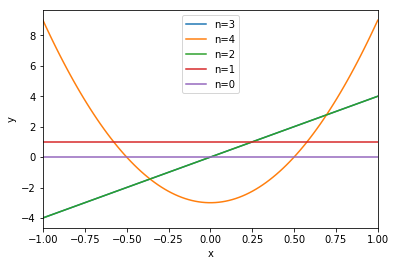

In [24]:
D = anp.linspace(-1,1,100)
Dfl = np.array(D,dtype=float)
plt.plot(D,Tprime2(D,3),label='n=3')
plt.plot(D,Tprime2(D,4),label='n=4')
plt.plot(D,Tprime2(D,2),label='n=2')
plt.plot(D,Tprime2(D,1),label='n=1')
plt.plot(D,Tprime2(D,0),label='n=0')
plt.legend()
plt.xlim(-1,1)
plt.xlabel("x")
plt.ylabel('y')
plt.show()

# Problem 7

In [16]:
import time

In [80]:
def funct(D):
        
    f = (anp.sin(D)+1)**(anp.sin(anp.cos(D)))
    return f

In [94]:
def p7(N):
    
    
    #vectors that will hold the derivative of each x0
    deriv1 = np.zeros(N)
    deriv3 = np.zeros(N)
    auto = np.zeros(N)
    
    time1 = np.zeros(N)
    time3 = np.zeros(N)
    time_auto = np.zeros(N)
        
    for i in range(N):
        x0 = np.random.random()
        start1 = time.time()
        deriv1[i] = fprime2(x0)
        end1 = time.time()
        time1[i] = end1-start1

        start3 = time.time()
        deriv3[i] = diff_c_4(f2, x0, 1e-4)
        end3 = time.time()
        time3[i] = end3 - start3
        
        start_auto = time.time()
        auto_deriv = grad(funct)
        auto[i] =auto_deriv(x0)
        end_auto = time.time()
        time_auto[i] = end_auto - start_auto
            
    error1 = np.full(N, 1e-18)        
    error3 = np.abs(deriv3-deriv1)
    error_auto = np.abs(auto-deriv1)
    
    
    plt.plot(time1,error1,'o',alpha=.5, label = "sympy")
    plt.plot(time3,error3,'o',alpha=.5, label = "difference quotient")
    plt.plot(time_auto,error_auto,'o',alpha=.5, label = 'autograd')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel("absolute error")
    plt.plot()
    

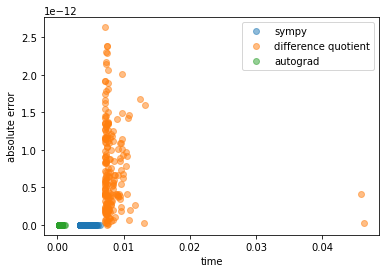

In [95]:
p7(200)